In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

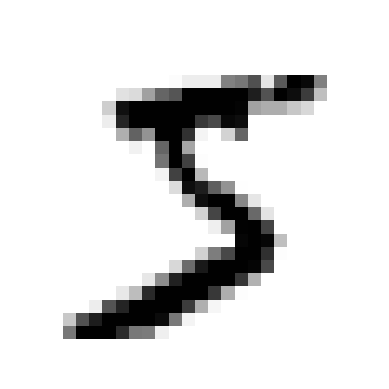

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.savefig("some_digit_plot.png")
plt.show()

In [10]:
y[0]

'5'

In [11]:
import numpy as np 

# as we need numerical datatypes
y = y.astype(np.uint8)

In [12]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [13]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

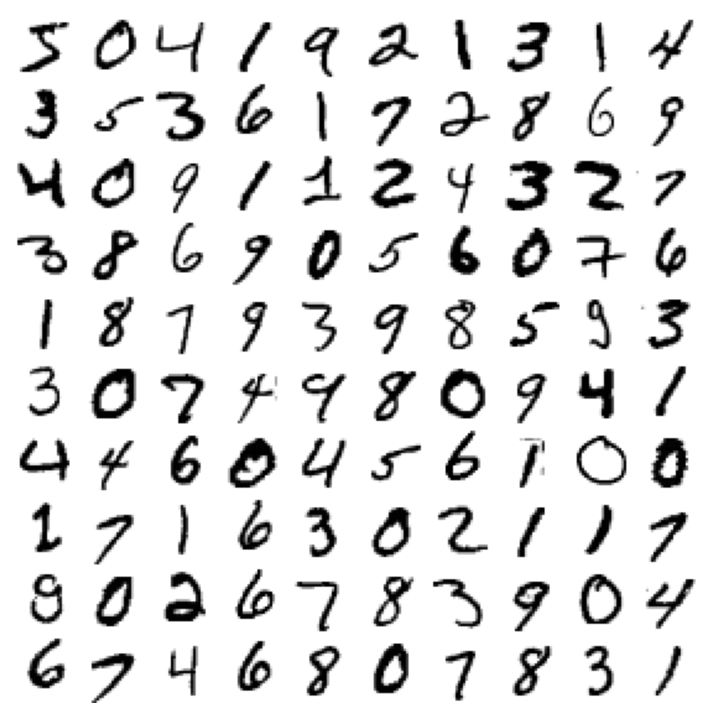

In [14]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.savefig("more_digits_plot.png")
plt.show()

In [15]:
#MINST dataset is already shuffled

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

MultiClass Classification

In [16]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [17]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [18]:
np.argmax(some_digit_scores)

5

In [19]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [21]:
sgd_clf.decision_function([some_digit])

array([[-19911.29456775, -27942.70732643,  -7002.25329743,
           350.46577883, -16832.64301724,  -1168.07182934,
        -26995.11413535, -13680.29403999, -12983.18191988,
        -12130.62256678]])

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8368 , 0.8769 , 0.89105])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.902  , 0.89335, 0.90535])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_clf = make_pipeline(StandardScaler(), RandomForestClassifier())
dt_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")
dt_scores = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

In [25]:
print("Random Forest Mean Accuracy:", rf_scores.mean())
print("Decision Tree Mean Accuracy:", dt_scores.mean())
print("K-Nearest Neighbors Mean Accuracy:", knn_scores.mean())

Random Forest Mean Accuracy: 0.9647666666666667
Decision Tree Mean Accuracy: 0.8596499999999999
K-Nearest Neighbors Mean Accuracy: 0.9403166666666666


In [26]:
# we see that Random forest and KNeighbours have more accuracy

In [27]:
from sklearn.model_selection import cross_val_predict

rf_predict = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict")
knn_predict = cross_val_predict(knn_clf, X_train, y_train, cv=3, method="predict")

In [28]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

In [29]:
rf_precision = precision_score(y_train, rf_predict,average="macro")
rf_recall = recall_score(y_train, rf_predict,average="macro")

print(rf_precision)
print(rf_recall)

0.9639105157804483
0.9639301298445396


In [30]:
knn_precision = precision_score(y_train, knn_predict,average="macro")
knn_recall = recall_score(y_train, knn_predict,average="macro")

print(knn_precision)
print(knn_recall)

0.9405293867730636
0.939408905716274


In [31]:
rf_probabilities = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")
knn_probabilities = cross_val_predict(knn_clf, X_train, y_train, cv=3, method="predict_proba")

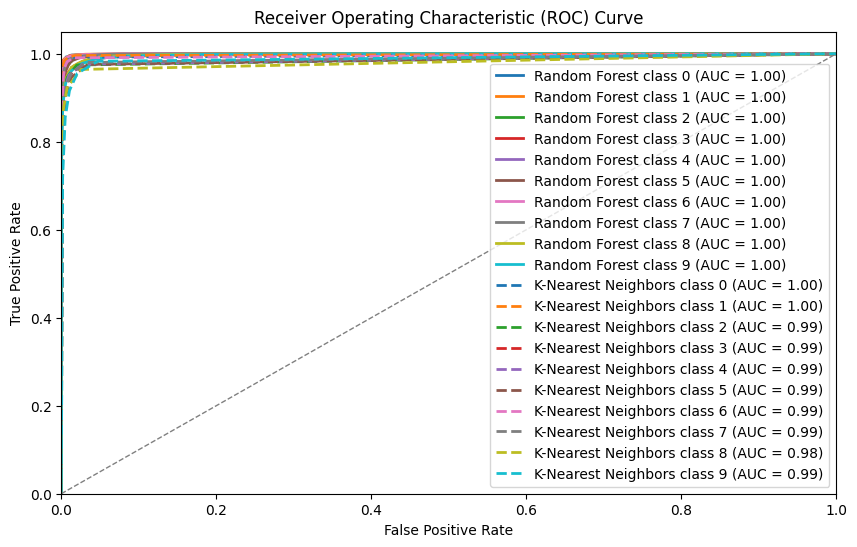

In [32]:
# ROC Curve and AUC for Random Forest
rf_fpr = {}
rf_tpr = {}
rf_auc = {}

# ROC Curve and AUC for K-Nearest Neighbors
knn_fpr = {}
knn_tpr = {}
knn_auc = {}

for i in range(len(set(y_train))):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_train, rf_probabilities[:, i], pos_label=i)
    rf_auc[i] = auc(rf_fpr[i], rf_tpr[i])

    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_train, knn_probabilities[:, i], pos_label=i)
    knn_auc[i] = auc(knn_fpr[i], knn_tpr[i])

# Plotting ROC Curves for Random Forest
plt.figure(figsize=(10, 6))
for i in range(len(set(y_train))):
    plt.plot(rf_fpr[i], rf_tpr[i], lw=2, label=f'Random Forest class {i} (AUC = {rf_auc[i]:.2f})')

# Plotting ROC Curves for K-Nearest Neighbors
for i in range(len(set(y_train))):
    plt.plot(knn_fpr[i], knn_tpr[i], lw=2, linestyle='--', label=f'K-Nearest Neighbors class {i} (AUC = {knn_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
#we can clearly see that random forest is the best model
#we can fine-tune its hyper parameters to make it even better

In [34]:
#using RandomGridSearchCV for random forest

In [37]:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

NameError: name 'accuracy_score' is not defined

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average="macro")
recall = recall_score(y_test,y_pred,average="macro")

In [40]:
print(f"Accuracy on the test set: {accuracy}")
print(f"Precison on the test set: {precision}")
print(f"Recall on the test set: {recall}")

Accuracy on the test set: 0.9691
Precison on the test set: 0.9688950172960593
Recall on the test set: 0.9688041086648062


Data Augmentation

In [41]:
from scipy.ndimage.interpolation import shift

C:\Users\ramch\AppData\Local\Temp\ipykernel_16232\987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [42]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

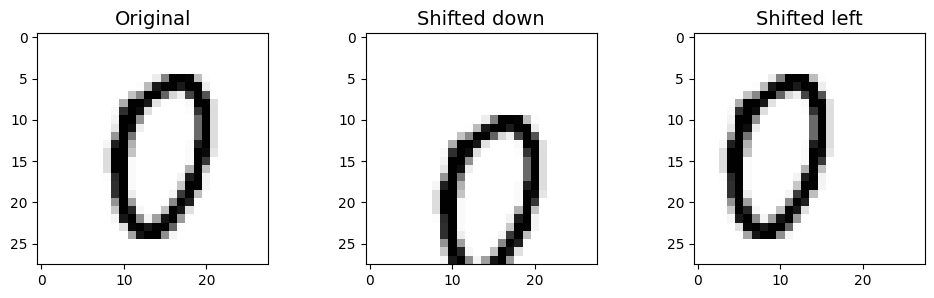

In [43]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [44]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [45]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [46]:
#using the best model

rf_clf.fit(X_train_augmented, y_train_augmented)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [48]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average="macro")
recall = recall_score(y_test,y_pred,average="macro")

In [49]:
print(f"Accuracy on the test set: {accuracy}")
print(f"Precison on the test set: {precision}")
print(f"Recall on the test set: {recall}")

Accuracy on the test set: 0.9786
Precison on the test set: 0.9784795173604092
Recall on the test set: 0.978414554371318


In [50]:
# we can see that the accuracy and precision increased by using data augmentation

Error Analysis

In [52]:
y_train_pred = cross_val_predict(rf_clf, X_train_augmented, y_train_augmented, cv=3)

NameError: name 'confusion_matrix' is not defined

In [54]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train_augmented, y_train_pred)
conf_mx

array([[29304,     5,    21,    11,    18,    20,    85,     3,   111,
           37],
       [    4, 33276,   154,    56,    54,     8,    31,    62,    37,
           28],
       [   77,    30, 29076,    84,    84,    16,    60,   183,   143,
           37],
       [   40,    27,   305, 29540,     7,   205,    17,   205,   209,
          100],
       [   64,    35,    27,     4, 28403,     4,   117,    63,    42,
          451],
       [   87,    16,    49,   228,    43, 26301,   184,    12,   118,
           67],
       [  122,    58,    14,     1,    48,   117, 29159,     0,    70,
            1],
       [   26,    72,   218,    19,   123,     6,     1, 30507,    45,
          308],
       [   67,   109,   102,   147,    98,   159,   103,    22, 28145,
          303],
       [  150,    55,    35,   261,   220,    81,    15,   182,   157,
        28589]], dtype=int64)

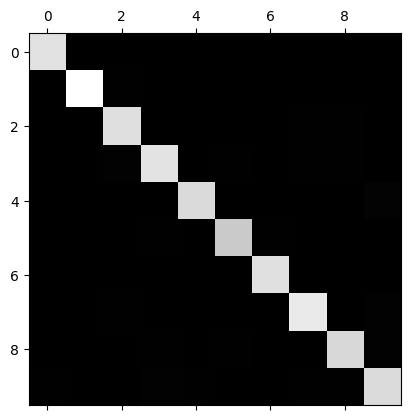

In [59]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot.png")
plt.show()

In [60]:
#getting only the errors from confusion matrix

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

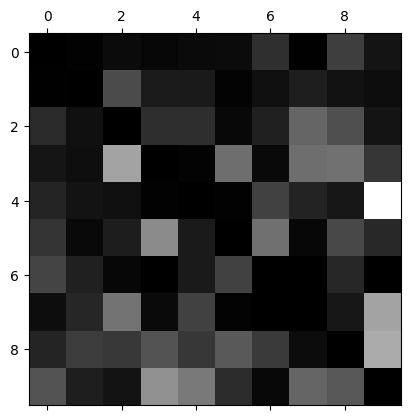

In [62]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot.png")
plt.show()

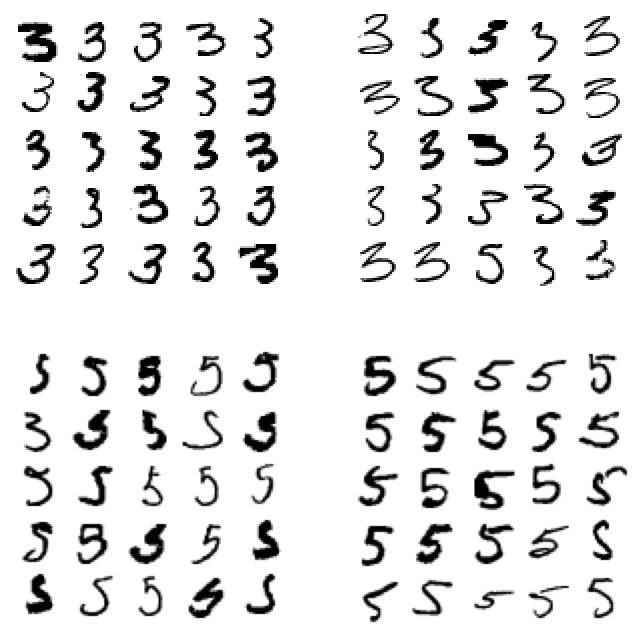

In [67]:
#plotting some of the errors see what went wrong 

#looking at 3 and 5's 

cl_a, cl_b = 3, 5
X_aa = X_train_augmented[(y_train_augmented == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_augmented[(y_train_augmented == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_augmented[(y_train_augmented == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_augmented[(y_train_augmented == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot.png")
plt.show()

In [68]:
# we can see that these are some obvious errors that means the model is underfit or we have to do more preprocessing of data
# this the reason why we use deeplearning for these tasks

In [1]:
# now lets look at some ensemble methods

In [2]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist.data, mnist.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

In [7]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

In [8]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)


c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [9]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9692, 0.9715, 0.859]

In [10]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
]

In [11]:
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42,
                                        tol=20))])

In [12]:
voting_clf.score(X_val, y_val)

0.9693

In [14]:
voting_clf.set_params(svm_clf=None)
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', None)]

In [15]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(max_iter=100, random_state=42, tol=20)]

In [16]:
del voting_clf.estimators_[2]

In [17]:
voting_clf.score(X_val, y_val)

0.9713

In [18]:
# this looks good

In [19]:
voting_clf.voting = "soft"

voting_clf.score(X_val, y_val)

0.9719

In [21]:
voting_clf.voting = "hard"

voting_clf.score(X_test, y_test)

0.9648

In [22]:
# now lets see for stacking

In [24]:
import numpy as np 

X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [25]:
X_val_predictions

array([[5., 5., 5.],
       [8., 8., 8.],
       [2., 2., 3.],
       ...,
       [7., 7., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [26]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [27]:
rnd_forest_blender.oob_score_

0.9703

In [28]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [29]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9661